# VAR VARMA VARMAX Model for Cruid Oil Forcasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries to define Required Funtions
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima.model_selection import train_test_split as time_trai
from sklearn import metrics
from sklearn.model_selection import ParameterGrid

from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from pmdarima import auto_arima


from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Load Data set
data = pd.read_csv('spot-prices-for-crude-oil-and-petroleum-products.csv',sep=';', header=0,index_col=0, parse_dates=True)
data

,Brent Spot Price (U.S. Dollars per Barrel),WTI Spot Price (U.S. Dollars per Barrel)
Date,,
2001-12-31,19.35,19.96
2001-12-27,18.87,21.07
2001-12-19,19.03,19.37
2001-12-11,17.61,18.04
2001-12-07,17.81,19.08
...,...,...
1986-05-14,NaN,15.53
1986-05-05,NaN,14.32
1986-04-30,NaN,13.38


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9193 entries, 2001-12-31 to 1986-04-08
Data columns (total 2 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Brent Spot Price (U.S. Dollars per Barrel)  8777 non-null   float64
 1   WTI Spot Price (U.S. Dollars per Barrel)    9061 non-null   float64
dtypes: float64(2)
memory usage: 215.5 KB


In [4]:
#Rename Column names
data.rename(columns={'Brent Spot Price (U.S. Dollars per Barrel)':'Brent_Price','WTI Spot Price (U.S. Dollars per Barrel)':'WIT_Price'}, inplace=True)
data.columns

Index(['Brent_Price', 'WIT_Price'], dtype='object')

In [18]:
pd.set_option('display.max_rows', 550)
data.head(550)

,Brent_Price,WIT_Price
Date,,
2001-12-31,19.35,19.96
2001-12-27,18.87,21.07
2001-12-19,19.03,19.37
2001-12-11,17.61,18.04
2001-12-07,17.81,19.08
2001-11-30,18.92,19.46
2001-11-28,18.81,19.37
2001-11-16,16.86,18.09
2001-11-07,18.86,20.11


<AxesSubplot:xlabel='Date'>

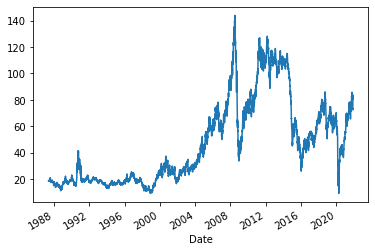

In [7]:
data['Brent_Price'].plot()

# EDA

In [45]:
#Chk Missing values in Data set
print("Missing Values Before Imputation :",pd.isnull(data).sum())
# Fill Missing values using interpolate-liner method
data.interpolate(method='linear', inplace=True)
#Chk Missing values in Data set
print("Missing Values After Interpolate-Linear Method :",pd.isnull(data).sum())


Missing Values Before Imputation : Brent_Price    416
WIT_Price      132
dtype: int64
Missing Values After Interpolate-Linear Method : Brent_Price    0
WIT_Price      0
dtype: int64


In [54]:
pd.set_option('display.max_rows', 550)

data.tail(15)

,Brent_Price,WIT_Price
Date,,
1986-10-23,18.63,14.88
1986-10-15,18.63,14.83
1986-10-01,18.63,15.23
1986-09-30,18.63,14.70
1986-08-29,18.63,15.93
1986-08-19,18.63,14.98
1986-08-04,18.63,14.00
1986-07-21,18.63,13.07
1986-07-15,18.63,11.85


(array([-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,
         -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,
          6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
         19,  20]),
 array([0.95693242, 0.95876454, 0.96059973, 0.96253951, 0.96450447,
        0.96660732, 0.96874053, 0.97101732, 0.97331047, 0.97565695,
        0.97797521, 0.98021674, 0.98240767, 0.98478889, 0.98730014,
        0.9896864 , 0.99184902, 0.99387419, 0.99584417, 0.99791826,
        1.        , 0.99791826, 0.99584417, 0.99387419, 0.99184902,
        0.9896864 , 0.98730014, 0.98478889, 0.98240767, 0.98021674,
        0.97797521, 0.97565695, 0.97331047, 0.97101732, 0.96874053,
        0.96660732, 0.96450447, 0.96253951, 0.96059973, 0.95876454,
        0.95693242]),
 <matplotlib.lines.Line2D at 0x15f302ae520>)

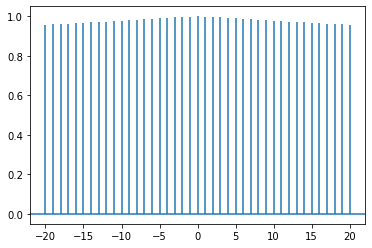

In [71]:
#Auto-Coorelation Matrix
df_series = data.set_index(data.index)
series_Brent = pd.Series(df_series['Brent_Price'], index= df_series.index)
series_WIT = pd.Series(df_series['WIT_Price'], index= df_series.index)

plt.acorr(series_Brent, maxlags=20)
#plt.show()
#plt.acorr(series_WIT, maxlags=20)
#plt.show()

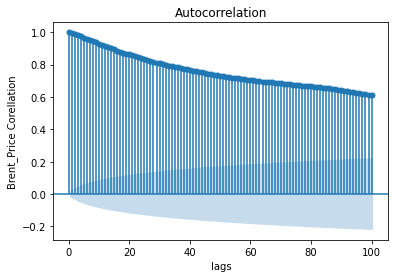

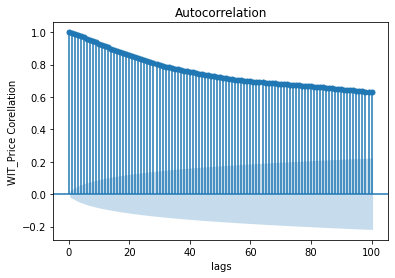

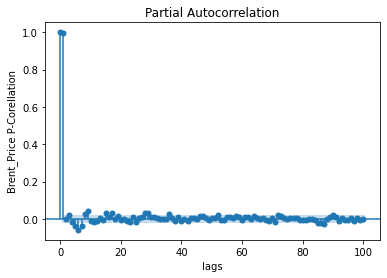

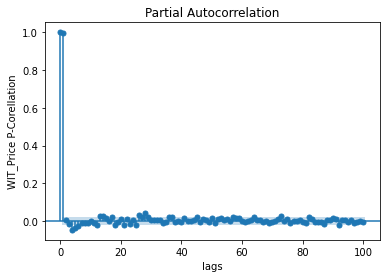

In [60]:
#plot ACF and PACF
#PACF removes indirect Coorelations
df_series = data.set_index(data.index)
series_Brent = pd.Series(df_series['Brent_Price'], index= df_series.index)
series_WIT = pd.Series(df_series['WIT_Price'], index= df_series.index)
#ACF()
plot_acf(series_Brent,lags= 100)
plt.xlabel("lags")
plt.ylabel("Brent_Price Corellation")
plot_acf(series_WIT,lags= 100)
plt.xlabel("lags")
plt.ylabel("WIT_Price Corellation")
#PACF()
plot_pacf(series_Brent,lags= 100)
plt.xlabel("lags")
plt.ylabel("Brent_Price P-Corellation")
plot_pacf(series_WIT,lags= 100)
plt.xlabel("lags")
plt.ylabel("WIT_Price P-Corellation")
plt.show()


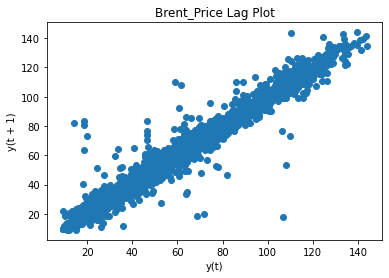

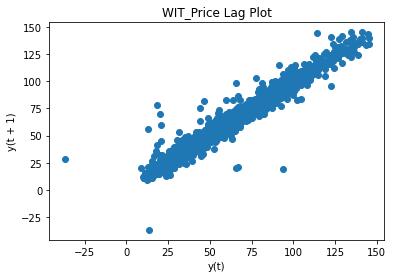

In [80]:
#Plooting Lag Plots
pd.plotting.lag_plot(data['Brent_Price'], lag=1)
plt.title("Brent_Price Lag Plot")
plt.show()
pd.plotting.lag_plot(data['WIT_Price'], lag=1)
plt.title("WIT_Price Lag Plot")
plt.show()

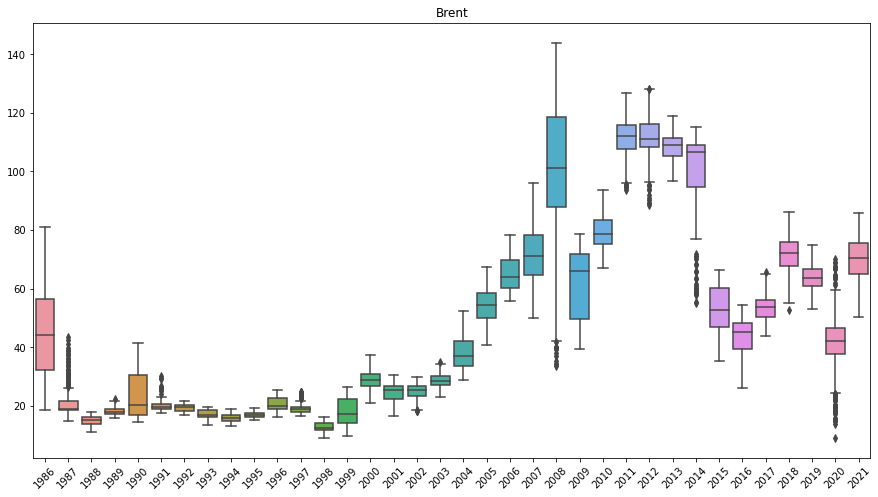

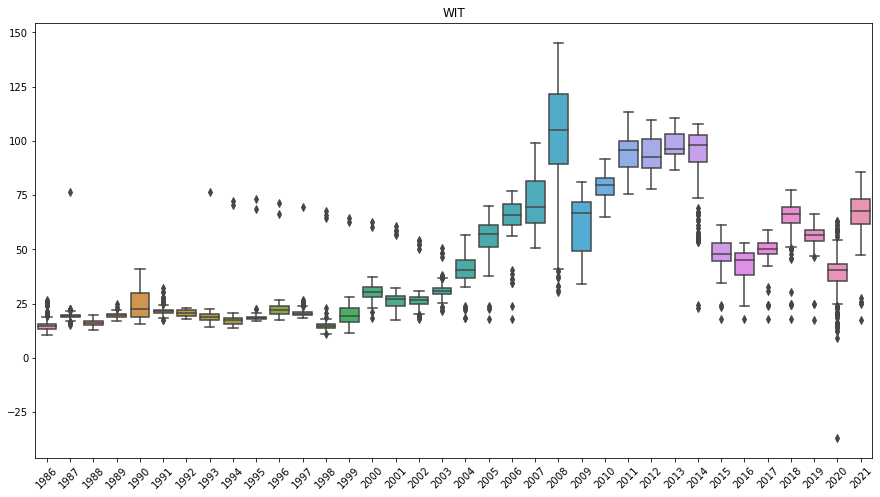

In [148]:

#Box Plot
df_series = data.set_index(data.index)
series_Brent = pd.Series(df_series['Brent_Price'])
series_WIT = pd.Series(df_series['WIT_Price'])
series_Brent, series_WIT
groups=series_Brent.groupby(pd.Grouper(freq='A'))
years_Brent=pd.DataFrame()
for name,group in groups:
    years_Brent[name.year]=pd.Series(group.values)
groups=series_WIT.groupby(pd.Grouper(freq='A'))
years_WIT=pd.DataFrame()
for name,group in groups:
    years_WIT[name.year]=pd.Series(group.values)
plt.figure(figsize=(15,8))
sns.boxplot(data=years_Brent)
#years_Brent.boxplot()
plt.xticks(rotation=45)
plt.title("Brent")
plt.show()
plt.figure(figsize=(15,8))
sns.boxplot(data=years_WIT)
#years_Brent.boxplot()
plt.xticks(rotation=45)
plt.title("WIT")
plt.show()


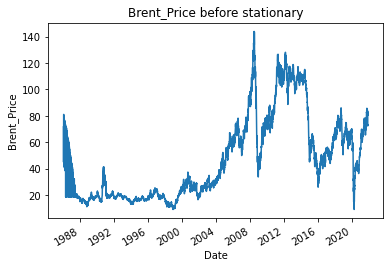

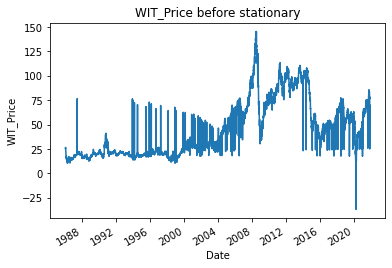

In [43]:
#Plot graphs
#Line Plot
for col in data:
    data[col].plot()
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.title(f"{col} before stationary")
    plt.show()


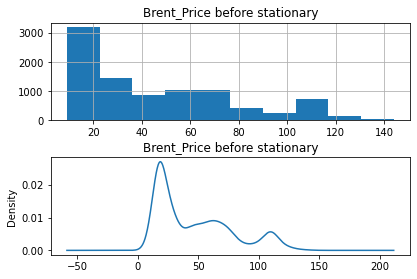

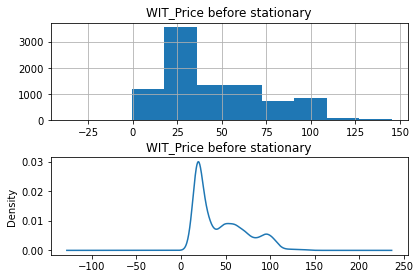

In [55]:
#Histogram
for col in data:
    plt.subplot(211)
    plt.title(f"{col} before stationary")
    data[col].hist()
    plt.tight_layout(pad=2.00)   #To give the space between subplots            
    plt.subplot(212)
    data[col].plot(kind='kde')
    plt.title(f"{col} before stationary")
    plt.show()

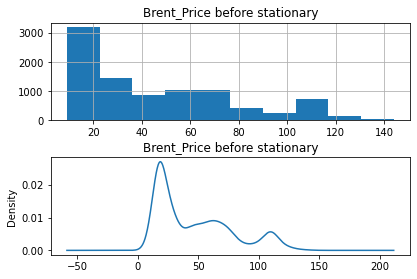

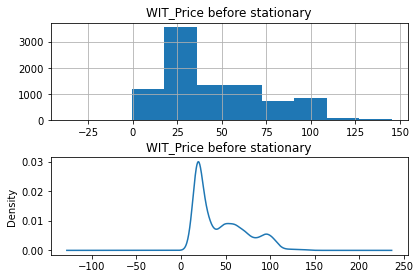

In [83]:
#Resample the data in monthly and liner interpolate
upsampled=data.resample('M').mean().interpolate(method='linear')
for col in upsampled:
    plt.subplot(211)
    plt.title(f"{col} before stationary")
    data[col].hist()
    plt.tight_layout(pad=2.00)   #To give the space between subplots            
    plt.subplot(212)
    data[col].plot(kind='kde')
    plt.title(f"{col} before stationary")
    plt.show()
data1=upsampled
data=data1


In [84]:
data.sort_index(ascending=True, inplace=True)
data.tail(100)

,Brent_Price,WIT_Price
Date,,
2013-08-31,111.280455,106.572727
2013-09-30,111.596500,106.289500
2013-10-31,109.076522,100.538261
2013-11-30,107.792000,93.864000
2013-12-31,110.756667,97.625238
2014-01-31,108.117727,91.368745
2014-02-28,108.900526,100.817368
2014-03-31,107.480952,100.803810
2014-04-30,107.755238,102.069048


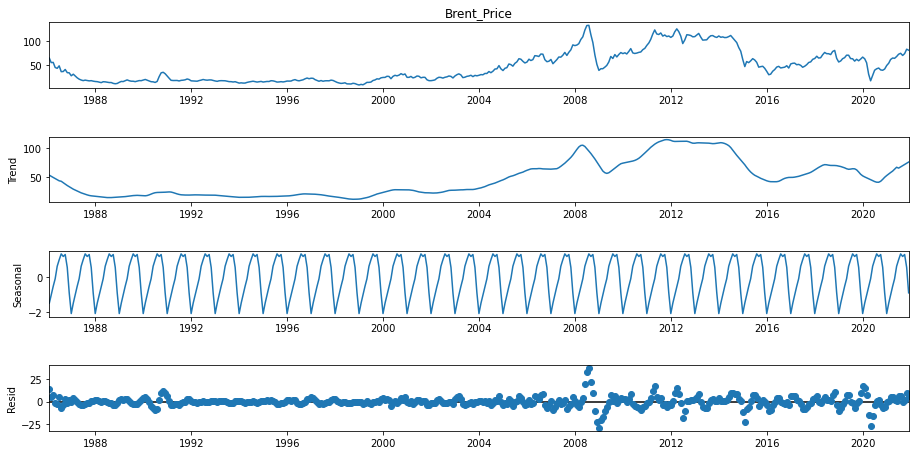

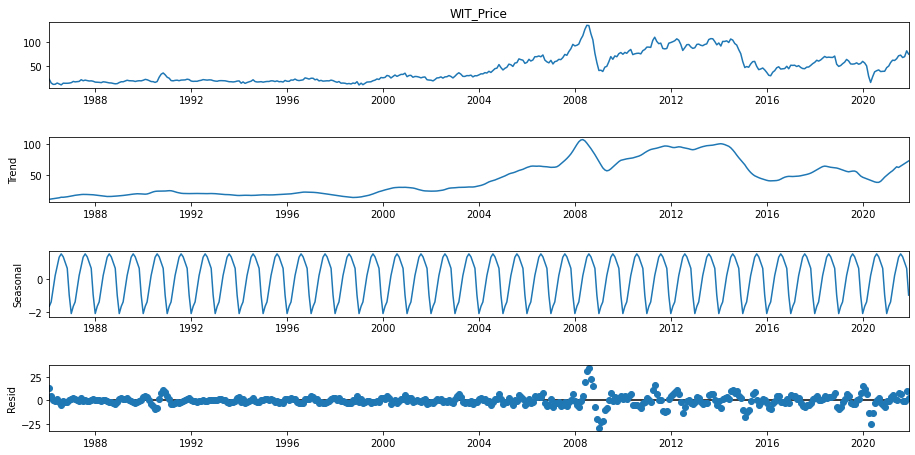

In [59]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (data):
    decomposition = sm.tsa.seasonal_decompose(data, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()
for col in data1:
    seasonal_decompose(data1[col])

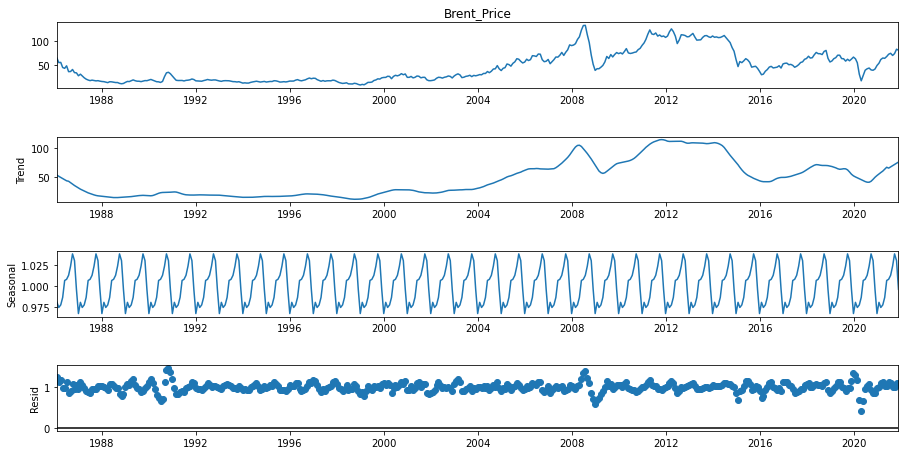

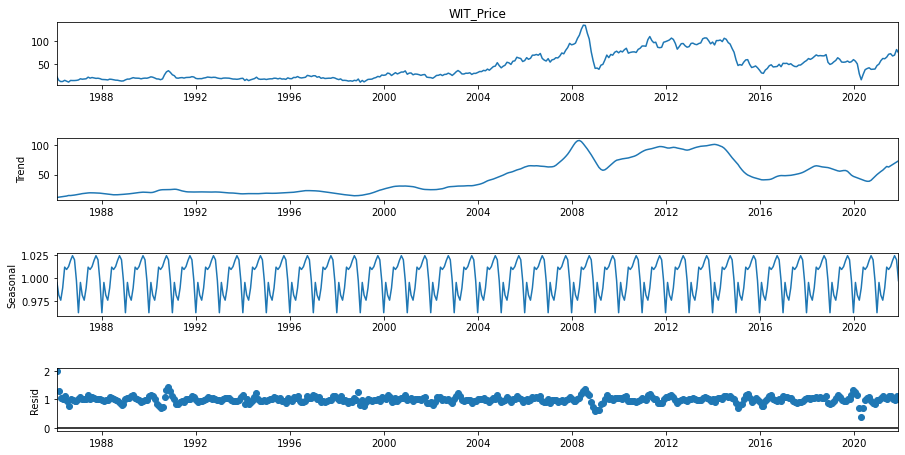

In [60]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (data):
    decomposition = sm.tsa.seasonal_decompose(data, model='multiplicative',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()
for col in data1:
    seasonal_decompose(data1[col])

<AxesSubplot:ylabel='Date'>

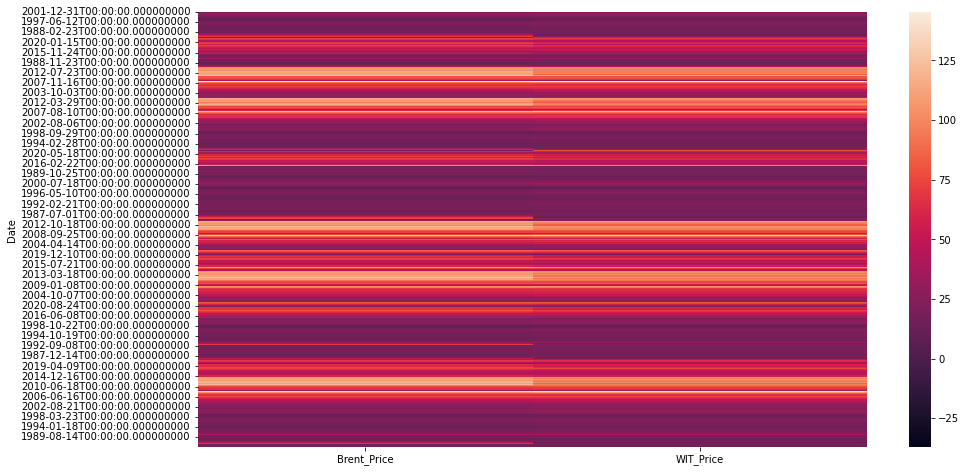

In [150]:
#Heat Map
plt.figure(figsize=(15,8))
sns.heatmap(data)

In [85]:
data

,Brent_Price,WIT_Price
Date,,
1986-01-31,65.205177,22.925455
1986-02-28,56.006723,15.454737
1986-03-31,56.382299,12.612500
1986-04-30,45.882289,12.843636
1986-05-31,44.164229,15.377619
1986-06-30,49.325775,13.425714
1986-07-31,37.310047,11.584545
1986-08-31,37.599321,15.096667
1986-09-30,41.787468,14.866667


In [86]:
#Write function to get Errors
def timeseries_evaluation_metrics_func(y_true, y_pred):   #Calculate MSE, MAE, RMSE, R2
    
    def mean_absolute_percentage_error(y_true, y_pred):    #Calculate MAPE
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [87]:
#Write differencing function to make stationary using Dickey-Fuller test-adfuller
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [88]:
#Use coint_johanset for trend
#It tests if there is a long run relationship betwwen features.
#It retures True or False wheather a variable has a long run relationship between other features

def cointegration_test(df): 
    res = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1
    cvts = res.cvt[:, d[str(1-0.05)]]
    def adjust(val, length= 6): 
        return str(val).ljust(length)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*25)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [89]:
#Transforms the differentuated values back
#It returns dataframe with the predicted values
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns: 
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

In [90]:
data

,Brent_Price,WIT_Price
Date,,
1986-01-31,65.205177,22.925455
1986-02-28,56.006723,15.454737
1986-03-31,56.382299,12.612500
1986-04-30,45.882289,12.843636
1986-05-31,44.164229,15.377619
1986-06-30,49.325775,13.425714
1986-07-31,37.310047,11.584545
1986-08-31,37.599321,15.096667
1986-09-30,41.787468,14.866667


# 5. Check for Stationary

In [91]:
#Apply Dickey-Fuller test-adfuller on only two coloumns
for name, column in data[['Brent_Price', 'WIT_Price']].iteritems():
    Augmented_Dickey_Fuller_Test_func(data[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: Brent_Price
Test Statistic                  -2.130915
p-value                          0.232267
Number of Lags Used              1.000000
Number of Observations Used    429.000000
Critical Value (1%)             -3.445685
Critical Value (5%)             -2.868301
Critical Value (10%)            -2.570371
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: WIT_Price
Test Statistic                  -2.223725
p-value                          0.197748
Number of Lags Used              3.000000
Number of Observations Used    427.000000
Critical Value (1%)             -3.445758
Critical Value (5%)             -2.868333
Critical Value (10%)            -2.570388
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary




In [68]:
"""
#Find Differencing using diff function
#Calculates the difference of a Dataframe element compared with another element in the Dataframe (default is element in previous row
data = data.diff()
data.dropna(inplace = True)
#Apply adfuller test
#Calculate Statistical values wheather available data is stationary or not
for name, column in data[['Brent_Price', 'WIT_Price']].iteritems():
    Augmented_Dickey_Fuller_Test_func(data[name],name)
    print('\n')
"""

Results of Dickey-Fuller Test for column: Brent_Price
Test Statistic                -8.355634e+00
p-value                        2.914404e-13
Number of Lags Used            1.800000e+01
Number of Observations Used    4.100000e+02
Critical Value (1%)           -3.446401e+00
Critical Value (5%)           -2.868615e+00
Critical Value (10%)          -2.570539e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: WIT_Price
Test Statistic                -8.328457e+00
p-value                        3.419598e-13
Number of Lags Used            1.800000e+01
Number of Observations Used    4.100000e+02
Critical Value (1%)           -3.446401e+00
Critical Value (5%)           -2.868615e+00
Critical Value (10%)          -2.570539e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary




In [92]:
data

,Brent_Price,WIT_Price
Date,,
1986-01-31,65.205177,22.925455
1986-02-28,56.006723,15.454737
1986-03-31,56.382299,12.612500
1986-04-30,45.882289,12.843636
1986-05-31,44.164229,15.377619
1986-06-30,49.325775,13.425714
1986-07-31,37.310047,11.584545
1986-08-31,37.599321,15.096667
1986-09-30,41.787468,14.866667


# 5.2 Train Test Split

In [8]:
#Train Test Split
X = data[['Brent_Price', 'WIT_Price']]
#train, test = time_train_test_split(X, test_size=30)
train, test = X[0:-12], X[-12:]
train.size,test.size

X.to_csv('dataset.csv', header=False)
train.to_csv('train.csv', header=False)
test.to_csv('test.csv', header=False)

# 5.3 Make Data Stationary

In [94]:
#Find Differencing using diff function
#Calculates the difference of a Dataframe element compared with another element in the Dataframe (default is element in previous row
train_diff = train.diff()
train_diff.dropna(inplace = True)
#Apply adfuller test
#Calculate Statistical values wheather available data is stationary or not
for name, column in train_diff[['Brent_Price', 'WIT_Price']].iteritems():
    Augmented_Dickey_Fuller_Test_func(train_diff[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: Brent_Price
Test Statistic                -1.119723e+01
p-value                        2.290457e-20
Number of Lags Used            2.000000e+00
Number of Observations Used    4.150000e+02
Critical Value (1%)           -3.446206e+00
Critical Value (5%)           -2.868530e+00
Critical Value (10%)          -2.570493e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: WIT_Price
Test Statistic                -9.687003e+00
p-value                        1.163352e-16
Number of Lags Used            5.000000e+00
Number of Observations Used    4.120000e+02
Critical Value (1%)           -3.446322e+00
Critical Value (5%)           -2.868581e+00
Critical Value (10%)          -2.570521e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary




# 5.4 Check again for Stationary

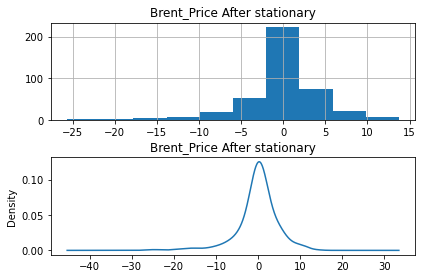

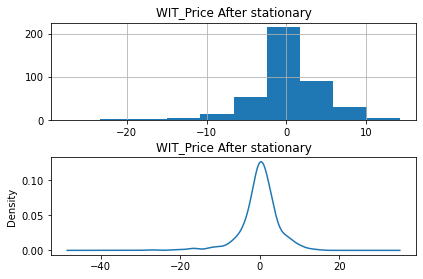

In [95]:
#Histogram
for col in train_diff:
    plt.subplot(211)
    plt.title(f"{col} After stationary")
    train_diff[col].hist()
    plt.tight_layout(pad=2.00)   #To give the space between subplots            
    plt.subplot(212)
    train_diff[col].plot(kind='kde')
    plt.title(f"{col} After stationary")
    plt.show()

# 6. Co-integration test

In [96]:
#Use coint_johanset for trend
cointegration_test(train_diff[['Brent_Price', 'WIT_Price']])

Column Name   >  Test Stat > C(95%)    =>   Signif  
 --------------------------------------------------
Brent_Price >  158.75    > 12.3212   =>   True
WIT_Price >  68.91     > 4.1296    =>   True


# 7. Regession Techniques-Multi-variate

# 7.1 Vector Autoregression Model (VAR)

In [97]:
resu = []
df_results_VAR = pd.DataFrame()

for i in [1,2,3,4,5,6,7,8,9]:
    fit_v = VAR(train_diff).fit(i)
    aic = fit_v.aic
    bic = fit_v.bic
    df1 = {'AR_Term':i, 'AIC': aic, 'BIC': bic}
    df_results_VAR = df_results_VAR.append(df1, ignore_index=True)
    clist = ['AR_Term','AIC','BIC']
    df_results_VAR = df_results_VAR[clist] 
    
df_results_VAR.sort_values(by=['AIC', 'BIC'], ascending=True)

best_values_VAR = df_results_VAR.sort_values(by=['AIC', 'BIC']).head(1)
best_values_VAR

AR_Term_value_VAR = best_values_VAR['AR_Term'].iloc[0]

print("AR_Term_value_VAR: ", AR_Term_value_VAR)

AR_Term_value_VAR:  9.0


In [103]:
#Autoregressive AR(9) appears to be providing the least AIC.

# 7.1.2 Fit VAR

In [98]:
model = VAR(train_diff)

results = model.fit(int(AR_Term_value_VAR))
display(results.summary())
z = results.forecast(y=train_diff.values, steps=len(test))
df_pred = pd.DataFrame(z, columns=train_diff.columns)
#df_pred["new_index"] = range(len(train), len(X))
#df_pred = df_pred.set_index("new_index")
df_pred["index"]=test.index
df_pred = df_pred.set_index("index")
df_pred.head()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 01, Apr, 2022
Time:                     12:20:34
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    4.74961
Nobs:                     409.000    HQIC:                   4.52425
Log likelihood:          -2017.73    FPE:                    79.5857
AIC:                      4.37670    Det(Omega_mle):         72.6765
--------------------------------------------------------------------
Results for equation Brent_Price
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.039847         0.216689            0.184           0.854
L1.Brent_Price         0.335354         0.110715            3.029           0.002
L1.WIT_Price           0.034585         0.110710  

,Brent_Price,WIT_Price
index,,
2020-12-31,1.283500,2.089539
2021-01-31,0.938206,1.115937
2021-02-28,-0.496256,-0.310640
2021-03-31,-0.516674,-0.806305
2021-04-30,-0.254532,-0.461889


# 7.1.3 Inverse Transformation

In [99]:
model = VAR(train_diff)

results = model.fit(int(AR_Term_value_VAR))
res = inverse_diff(data[['Brent_Price', 'WIT_Price']],df_pred)
res.head()

,Brent_Price,WIT_Price,Brent_Price_1st_inv_diff,WIT_Price_1st_inv_diff
index,,,,
2020-12-31,1.283500,2.089539,82.818738,76.809338
2021-01-31,0.938206,1.115937,83.756944,77.925275
2021-02-28,-0.496256,-0.310640,83.260688,77.614634
2021-03-31,-0.516674,-0.806305,82.744013,76.808329
2021-04-30,-0.254532,-0.461889,82.489482,76.346440


# 7.1.4 Evaluation of VAR

Evaluation metric for Brent_Price
Evaluation metric results:-
MSE is : 292.04626017256965
MAE is : 14.17864023783487
RMSE is : 17.08936102294552
MAPE is : 23.220524089096482
R2 is : -2.198876876666701

Evaluation metric for WIT_Price
Evaluation metric results:-
MSE is : 233.37680901849967
MAE is : 12.465412776601001
RMSE is : 15.27667532608125
MAPE is : 21.816535580454158
R2 is : -1.5262078092932612



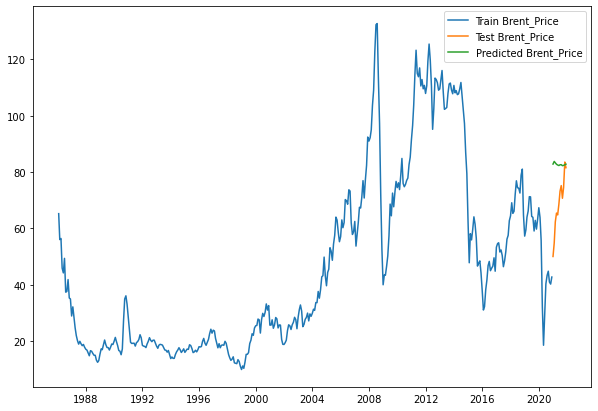

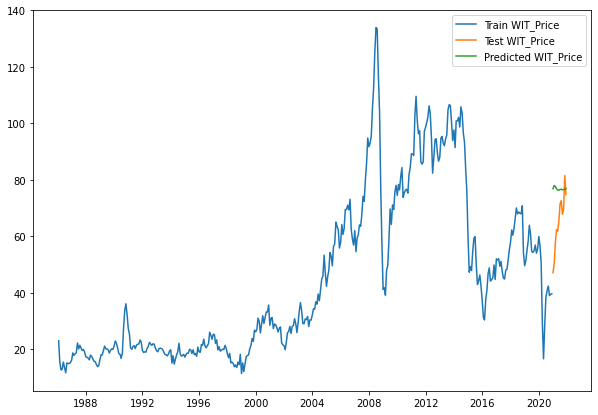

In [100]:
for i in ['Brent_Price', 'WIT_Price' ]:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)] , res[str(i)+'_1st_inv_diff'])

for i in ['Brent_Price', 'WIT_Price']:
    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot(train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(res[str(i)+'_1st_inv_diff'],label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()

In [101]:
for i in ['Brent_Price', 'WIT_Price']:
    print(res[str(i)+'_1st_inv_diff'])

index
2020-12-31    82.818738
2021-01-31    83.756944
2021-02-28    83.260688
2021-03-31    82.744013
2021-04-30    82.489482
2021-05-31    82.292033
2021-06-30    82.557733
2021-07-31    82.601466
2021-08-31    82.243850
2021-09-30    82.358569
2021-10-31    82.556161
2021-11-30    82.785766
Name: Brent_Price_1st_inv_diff, dtype: float64
index
2020-12-31    76.809338
2021-01-31    77.925275
2021-02-28    77.614634
2021-03-31    76.808329
2021-04-30    76.346440
2021-05-31    76.292839
2021-06-30    76.503250
2021-07-31    76.655160
2021-08-31    76.364160
2021-09-30    76.505104
2021-10-31    76.646671
2021-11-30    76.887064
Name: WIT_Price_1st_inv_diff, dtype: float64


# Forcasting for next 12 months

TypeError: 'VARResultsWrapper' object is not subscriptable

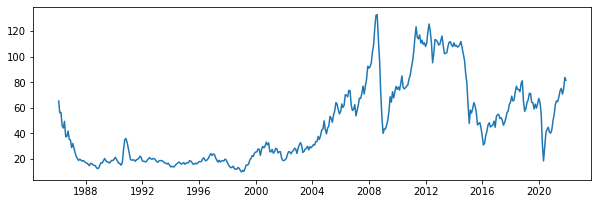

In [161]:
#Forecast nex 12 Months
model = VAR(X)
results = model.fit(9)
#display(results.summary())
z = results.forecast(y=X.values, steps=12)
results.plot_forecast(steps=12)
z
"""
model = VARMAX(X[['Brent_Price', 'WIT_Price']], order=(1, 1),trends = 'c').fit(disp=False)
#order=(p_value_VARMA, q_value_VARMA),trends = tr_value_VARMA).fit(disp=False)
result = model.forecast(steps = 12)
plt.plot(data=result)

plt.rcParams["figure.figsize"] = [10,7]
plt.subplot(211)
plt.plot(X['Brent_Price'], label='Dataset Brent_Price')
plt.plot(result['Brent_Price'], label='Forcasted Brent_Price')
plt.legend(loc=1)
plt.show()
plt.subplot(212)
plt.plot(X['WIT_Price'], label='Dataset WIT_Price')
plt.plot(result['WIT_Price'], label='Forcasted WIT_Price')
plt.legend(loc=1)
plt.show()
result
"""

# 7.2 VARMA

# 7.2.1 Get best p, q and tr Terms

In [58]:
#Use Parameter grid

param_grid = {'p': [1,2,3], 'q':[1,2,3], 'tr': ['n','c','t','ct']}
pg = list(ParameterGrid(param_grid))
pg

[{'p': 1, 'q': 1, 'tr': 'n'},
 {'p': 1, 'q': 1, 'tr': 'c'},
 {'p': 1, 'q': 1, 'tr': 't'},
 {'p': 1, 'q': 1, 'tr': 'ct'},
 {'p': 1, 'q': 2, 'tr': 'n'},
 {'p': 1, 'q': 2, 'tr': 'c'},
 {'p': 1, 'q': 2, 'tr': 't'},
 {'p': 1, 'q': 2, 'tr': 'ct'},
 {'p': 1, 'q': 3, 'tr': 'n'},
 {'p': 1, 'q': 3, 'tr': 'c'},
 {'p': 1, 'q': 3, 'tr': 't'},
 {'p': 1, 'q': 3, 'tr': 'ct'},
 {'p': 2, 'q': 1, 'tr': 'n'},
 {'p': 2, 'q': 1, 'tr': 'c'},
 {'p': 2, 'q': 1, 'tr': 't'},
 {'p': 2, 'q': 1, 'tr': 'ct'},
 {'p': 2, 'q': 2, 'tr': 'n'},
 {'p': 2, 'q': 2, 'tr': 'c'},
 {'p': 2, 'q': 2, 'tr': 't'},
 {'p': 2, 'q': 2, 'tr': 'ct'},
 {'p': 2, 'q': 3, 'tr': 'n'},
 {'p': 2, 'q': 3, 'tr': 'c'},
 {'p': 2, 'q': 3, 'tr': 't'},
 {'p': 2, 'q': 3, 'tr': 'ct'},
 {'p': 3, 'q': 1, 'tr': 'n'},
 {'p': 3, 'q': 1, 'tr': 'c'},
 {'p': 3, 'q': 1, 'tr': 't'},
 {'p': 3, 'q': 1, 'tr': 'ct'},
 {'p': 3, 'q': 2, 'tr': 'n'},
 {'p': 3, 'q': 2, 'tr': 'c'},
 {'p': 3, 'q': 2, 'tr': 't'},
 {'p': 3, 'q': 2, 'tr': 'ct'},
 {'p': 3, 'q': 3, 'tr': 'n'},
 {

In [111]:
#Find best parameters
df_results = pd.DataFrame(columns=['p', 'q', 'tr','RMSE Brent_Price','RMSE WIT_Price'])
print('starting grid search')
start = timer()
for a,b in enumerate(pg):
    p = b.get('p')
    q = b.get('q')
    tr = b.get('tr')
    model = VARMAX(train_diff, order=(p,q), trend=tr).fit()
    z = model.forecast(y=train_diff[['Brent_Price', 'WIT_Price']].values, steps=len(test))
    df_pred = pd.DataFrame(z, columns=['Brent_Price', 'WIT_Price'])
    res = inverse_diff(df[['Brent_Price', 'WIT_Price']],df_pred)
    Brent_Pricermse = np.sqrt(metrics.mean_squared_error(test.Brent_Price, res.Brent_Price_1st_inv_diff))
   
    WIT_Pricermse = np.sqrt(metrics.mean_squared_error(test.WIT_Price, res.WIT_Price_1st_inv_diff))
    
    df_results = df_results.append({'p': p, 'q': q, 'tr': tr,'RMSE Brent_Price': Brent_Pricermse,'RMSE WIT_Price':WIT_Pricermse}, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')

starting grid search


KeyboardInterrupt: 

In [43]:
df_results.sort_values(by = ['RMSE Brent_Price', 'RMSE WIT_Price'] )

In [ ]:
best_values_VARMA = df_results_VARMA.sort_values(by=['RMSE Brent_Price', 'RMSE WIT_Price']).head(1)
best_values_VARMA

In [ ]:
p_value_VARMA = best_values_VARMA['p'].iloc[0]
q_value_VARMA = best_values_VARMA['q'].iloc[0] 
tr_value_VARMA = best_values_VARMA['tr'].iloc[0] 

print("p_value_VARMA: ", p_value_VARMA)
print("q_value_VARMA: ", q_value_VARMA)
print("tr_value_VARMA: ", tr_value_VARMA)

# 7.2.2 Fit VARMA

In [125]:
model = VARMAX(train_diff[['Brent_Price', 'WIT_Price']], order=(1, 1),trends = 'c').fit(disp=False)
#order=(p_value_VARMA, q_value_VARMA),trends = tr_value_VARMA).fit(disp=False)
result = model.forecast(steps = len(test))

# 7.2.3 Inverse Transformation

In [127]:
res = inverse_diff(data[['Brent_Price', 'WIT_Price']], result)

res.head()

,Brent_Price,WIT_Price,Brent_Price_1st_inv_diff,WIT_Price_1st_inv_diff
2020-12-31,0.637068,1.067253,82.172306,75.787051
2021-01-31,0.132084,0.124440,82.304390,75.911491
2021-02-28,-0.012575,0.159728,82.291816,76.071219
2021-03-31,-0.041042,0.014729,82.250773,76.085947
2021-04-30,-0.053099,0.063372,82.197675,76.149319


# 7.2.4 Evaluation of VARMA

Evaluation metric for Brent_Price
Evaluation metric results:-
MSE is : 273.3739228147119
MAE is : 13.676977126173604
RMSE is : 16.53402318900974
MAPE is : 22.416955740380224
R2 is : -1.9943527434965782

Evaluation metric for WIT_Price
Evaluation metric results:-
MSE is : 211.35128730054498
MAE is : 11.904882037576888
RMSE is : 14.537925825252549
MAPE is : 20.80810708182768
R2 is : -1.2877906109363977



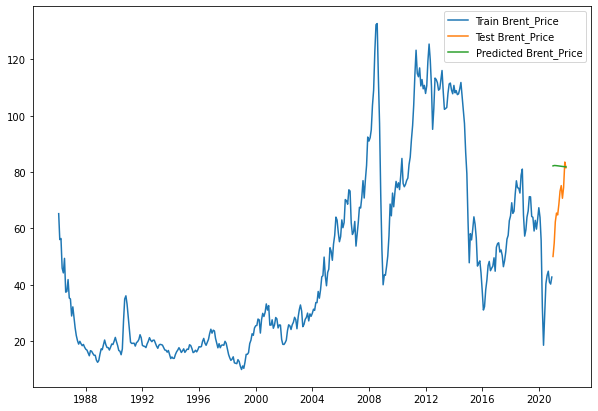

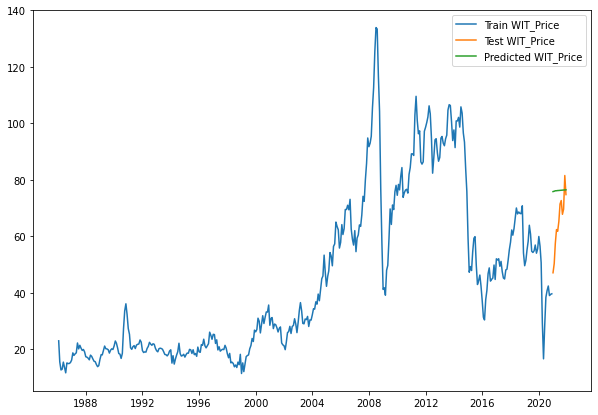

In [128]:
for i in ['Brent_Price', 'WIT_Price']:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)] , res[str(i)+'_1st_inv_diff'])

for i in ['Brent_Price', 'WIT_Price']:
    
    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot(train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(res[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()

In [129]:
for i in ['Brent_Price', 'WIT_Price']:
    print(res[str(i)+'_1st_inv_diff'])

2020-12-31    82.172306
2021-01-31    82.304390
2021-02-28    82.291816
2021-03-31    82.250773
2021-04-30    82.197675
2021-05-31    82.144144
2021-06-30    82.089025
2021-07-31    82.034323
2021-08-31    81.979268
2021-09-30    81.924379
2021-10-31    81.869390
2021-11-30    81.814455
Freq: M, Name: Brent_Price_1st_inv_diff, dtype: float64
2020-12-31    75.787051
2021-01-31    75.911491
2021-02-28    76.071219
2021-03-31    76.085947
2021-04-30    76.149319
2021-05-31    76.177392
2021-06-30    76.223016
2021-07-31    76.258330
2021-08-31    76.299246
2021-09-30    76.337007
2021-10-31    76.376516
2021-11-30    76.415050
Freq: M, Name: WIT_Price_1st_inv_diff, dtype: float64


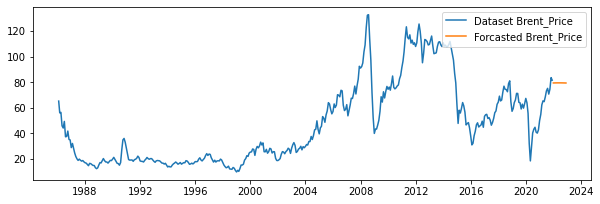

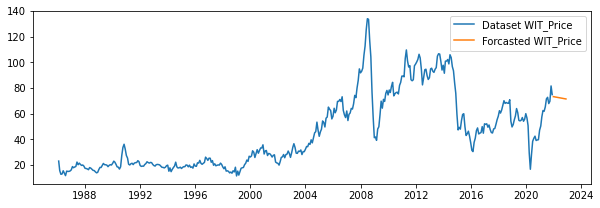

,Brent_Price,WIT_Price
2021-12-31,79.382203,73.141102
2022-01-31,79.410303,72.982137
2022-02-28,79.431554,72.821714
2022-03-31,79.446171,72.659948
2022-04-30,79.454368,72.496952
2022-05-31,79.456350,72.332834
2022-06-30,79.452322,72.167700
2022-07-31,79.442481,72.001653
2022-08-31,79.427024,71.834793
2022-09-30,79.406140,71.667215


In [160]:
#Forecast nex 12 Months

model = VARMAX(X[['Brent_Price', 'WIT_Price']], order=(1, 1),trends = 'c').fit(disp=False)
#order=(p_value_VARMA, q_value_VARMA),trends = tr_value_VARMA).fit(disp=False)
result = model.forecast(steps = 12)
plt.plot(data=result)

plt.rcParams["figure.figsize"] = [10,7]
plt.subplot(211)
plt.plot(X['Brent_Price'], label='Dataset Brent_Price')
plt.plot(result['Brent_Price'], label='Forcasted Brent_Price')
plt.legend(loc=1)
plt.show()
plt.subplot(212)
plt.plot(X['WIT_Price'], label='Dataset WIT_Price')
plt.plot(result['WIT_Price'], label='Forcasted WIT_Price')
plt.legend(loc=1)
plt.show()
result

# 7.3 VARMA with Auto Arima

# 7.3.1 Get best p and q

In [117]:
pq = []
for name, column in train_diff[['Brent_Price', 'WIT_Price']].iteritems():
    print(f'Searching order of p and q for : {name}')
    stepwise_model = auto_arima(train_diff[name],start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)
    parameter = stepwise_model.get_params().get('order')
    print(f'optimal order for:{name} is: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))

Searching order of p and q for : Brent_Price
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=59413.492, Time=1.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=61734.412, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=60444.444, Time=0.47 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=59749.844, Time=0.79 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=59414.201, Time=7.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=59414.532, Time=2.44 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=59469.530, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=60046.532, Time=0.88 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=59410.613, Time=6.38 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=59408.089, Time=8.51 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=59393.048, Time=4.64 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=59660.145, Time=1.41 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=59393.882, Time=7.68 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC

KeyboardInterrupt: 

In [118]:
pq

[]

In [ ]:
df_results = pd.DataFrame(columns=['p', 'q', 'tr','RMSE Brent_Price','RMSE WIT_Price'])
print('starting grid search')
start = timer()
for a,b in enumerate(pg):
    p = b.get('p')
    q = b.get('q')
    tr = b.get('tr')
    model = VARMAX(train_diff, order=(p,q), trend=tr).fit()
    z = model.forecast(y=train_diff[['Brent_Price', 'WIT_Price']].values, steps=len(test))
    df_pred = pd.DataFrame(z, columns=['Brent_Price', 'WIT_Price'])
    res = inverse_diff(df[['Brent_Price', 'WIT_Price']],df_pred)
    Brent_Pricermse = np.sqrt(metrics.mean_squared_error(test.Brent_Price, res.Brent_Price_1st_inv_diff))
    WIT_Pricermse = np.sqrt(metrics.mean_squared_error(test.WIT_Price, res.WIT_Price_1st_inv_diff))
    
    df_results = df_results.append({'p': p, 'q': q, 'tr': tr,'RMSE Brent_Price': Brent_Pricermse,'RMSE WIT_Price':WIT_Pricermse}, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')



df_results_VARMA_2 = pd.DataFrame(columns=['p', 'q', 'tr','RMSE Brent_Price','RMSE WIT_Price'])

for i in pq:
    if i[0]== 0 and i[2] ==0:
        pass
    else:
        print(f' Running for {i}')
        model = VARMAX(train_diff[['Brent_Price', 'WIT_Price']], order=(i[0],i[2])).fit(disp=False)
        result = model.forecast(steps = len(testX))
        inv_res = inverse_diff(df[['Brent_Price', 'WIT_Price']], result)
        Brent_Pricermse = np.sqrt(metrics.mean_squared_error(test.Brent_Price, res.Brent_Price_1st_inv_diff))
        WIT_Pricermse = np.sqrt(metrics.mean_squared_error(test.WIT_Price, res.WIT_Price_1st_inv_diff))
        
        df_results_VARMA_2 = df_results_VARMA_2.append({'p': i[0], 'q': i[2], 'RMSE Brent_Price': Brent_Pricermse,'RMSE WIT_Price':WIT_Pricermse}, ignore_index=True)

df_results_VARMA_2.sort_values(by=['RMSE Brent_Price','RMSE WIT_Price'])


In [ ]:
best_values_VAR_2 = df_results_VARMA_2.sort_values(by=['RMSE Brent_Price','RMSE WIT_Price']).head(1)
best_values_VAR_2

In [ ]:
p_value_VARMA_2 = best_values_VAR_2['p'].iloc[0]
q_value_VARMA_2 = best_values_VAR_2['q'].iloc[0] 

print("p_value_VARMA_2: ", p_value_VARMA_2)
print("q_value_VARMA_2: ", q_value_VARMA_2)

# 7.3.2 Fit VARMA_2

In [149]:
model = VARMAX(train_diff[['Brent_Price', 'WIT_Price']],order=(1,1)).fit(disp=False) 
#order=(int(p_value_VARMA_2),int(q_value_VARMA_2))).fit(disp=False)
result = model.forecast(steps = len(test))

# 7.3.3 Inverse Transformation

In [150]:
res = inverse_diff(df[['Brent_Price', 'WIT_Price']],result)
res.head()

,Brent_Price,WIT_Price,Brent_Price_1st_inv_diff,WIT_Price_1st_inv_diff
2020-12-31,0.637068,1.067253,82.172306,75.787051
2021-01-31,0.132084,0.124440,82.304390,75.911491
2021-02-28,-0.012575,0.159728,82.291816,76.071219
2021-03-31,-0.041042,0.014729,82.250773,76.085947
2021-04-30,-0.053099,0.063372,82.197675,76.149319


# 7.3.4 Evaluation of VARMA_2

Evaluation metric for Brent_Price
Evaluation metric results:-
MSE is : 273.3739228147119
MAE is : 13.676977126173604
RMSE is : 16.53402318900974
MAPE is : 22.416955740380224
R2 is : -1.9943527434965782

Evaluation metric for WIT_Price
Evaluation metric results:-
MSE is : 211.35128730054498
MAE is : 11.904882037576888
RMSE is : 14.537925825252549
MAPE is : 20.80810708182768
R2 is : -1.2877906109363977



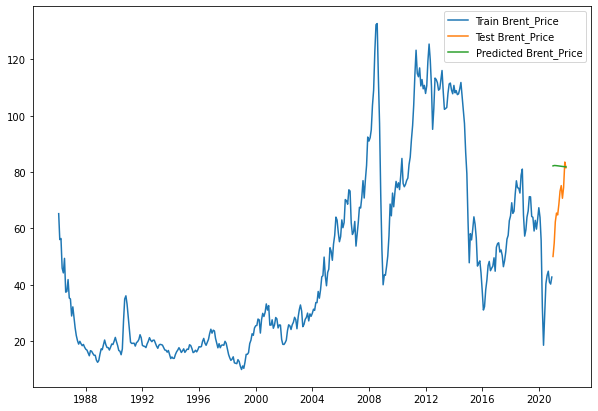

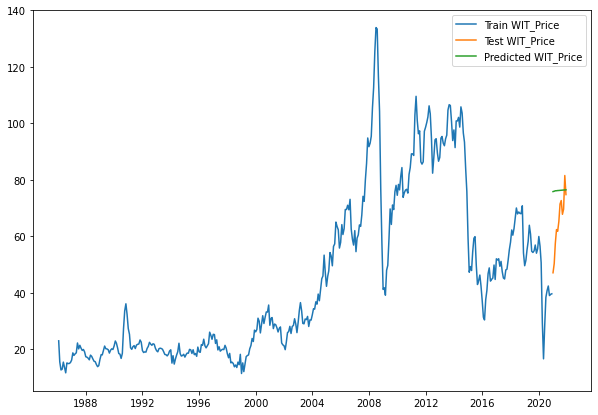

In [151]:
for i in ['Brent_Price', 'WIT_Price']:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)] , res[str(i)+'_1st_inv_diff'])

for i in ['Brent_Price', 'WIT_Price']:
    
    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot(train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(res[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()

In [153]:
for i in ['Brent_Price', 'WIT_Price']:
    print(res[str(i)+'_1st_inv_diff'])

2020-12-31    82.172306
2021-01-31    82.304390
2021-02-28    82.291816
2021-03-31    82.250773
2021-04-30    82.197675
2021-05-31    82.144144
2021-06-30    82.089025
2021-07-31    82.034323
2021-08-31    81.979268
2021-09-30    81.924379
2021-10-31    81.869390
2021-11-30    81.814455
Freq: M, Name: Brent_Price_1st_inv_diff, dtype: float64
2020-12-31    75.787051
2021-01-31    75.911491
2021-02-28    76.071219
2021-03-31    76.085947
2021-04-30    76.149319
2021-05-31    76.177392
2021-06-30    76.223016
2021-07-31    76.258330
2021-08-31    76.299246
2021-09-30    76.337007
2021-10-31    76.376516
2021-11-30    76.415050
Freq: M, Name: WIT_Price_1st_inv_diff, dtype: float64


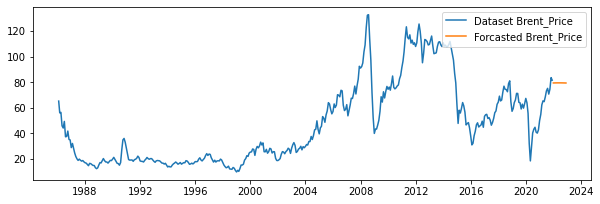

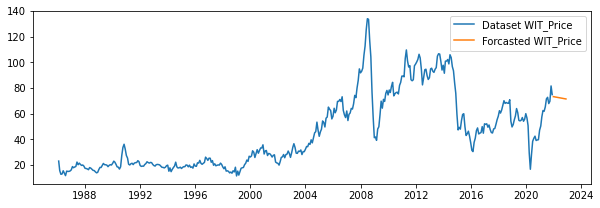

,Brent_Price,WIT_Price
2021-12-31,79.382203,73.141102
2022-01-31,79.410303,72.982137
2022-02-28,79.431554,72.821714
2022-03-31,79.446171,72.659948
2022-04-30,79.454368,72.496952
2022-05-31,79.456350,72.332834
2022-06-30,79.452322,72.167700
2022-07-31,79.442481,72.001653
2022-08-31,79.427024,71.834793
2022-09-30,79.406140,71.667215


In [159]:
#Forecast nex 12 Months

model = VARMAX(X[['Brent_Price', 'WIT_Price']],order=(1,1)).fit(disp=False) 
#order=(int(p_value_VARMA_2),int(q_value_VARMA_2))).fit(disp=False)
result = model.forecast(steps = 12)
plt.plot(data=result)

plt.rcParams["figure.figsize"] = [10,7]
plt.subplot(211)
plt.plot(X['Brent_Price'], label='Dataset Brent_Price')
plt.plot(result['Brent_Price'], label='Forcasted Brent_Price')
plt.legend(loc=1)
plt.show()
plt.subplot(212)
plt.plot(X['WIT_Price'], label='Dataset WIT_Price')
plt.plot(result['WIT_Price'], label='Forcasted WIT_Price')
plt.legend(loc=1)
plt.show()
result



In [152]:
result

,Brent_Price,WIT_Price
2021-12-31,79.382203,73.141102
2022-01-31,79.410303,72.982137
2022-02-28,79.431554,72.821714
2022-03-31,79.446171,72.659948
2022-04-30,79.454368,72.496952
2022-05-31,79.456350,72.332834
2022-06-30,79.452322,72.167700
2022-07-31,79.442481,72.001653
2022-08-31,79.427024,71.834793
2022-09-30,79.406140,71.667215
